In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Import Train data

In [3]:
data_train = pd.read_csv('SalaryData_Train(1).csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data_train.shape

(30161, 14)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
data_train.describe(include='all')

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22285,9840,NaN,14065,4038,12463,25932,20380,NaN,NaN,NaN,27504,22653
mean,38.438115,NaN,NaN,10.121316,NaN,NaN,NaN,NaN,NaN,1092.044064,88.302311,40.931269,NaN,NaN
std,13.134830,NaN,NaN,2.550037,NaN,NaN,NaN,NaN,NaN,7406.466611,404.121321,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [7]:
corr_matrix = data_train.corr()
corr_matrix

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


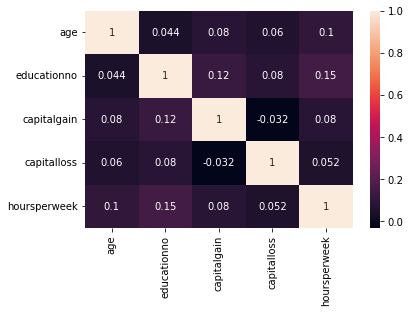

In [8]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [9]:
le = LabelEncoder()
data_train['workclass'] = le.fit_transform(data_train['workclass'])
data_train['education'] = le.fit_transform(data_train['education'])
data_train['maritalstatus'] = le.fit_transform(data_train['maritalstatus'])
data_train['occupation'] = le.fit_transform(data_train['occupation'])
data_train['relationship'] = le.fit_transform(data_train['relationship'])
data_train['race'] = le.fit_transform(data_train['race'])
data_train['sex'] = le.fit_transform(data_train['sex'])
data_train['native'] = le.fit_transform(data_train['native'])
data_train['Salary'] = le.fit_transform(data_train['Salary'])

In [10]:
data_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [11]:
corr_matrix_1 = data_train.corr()
corr_matrix_1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


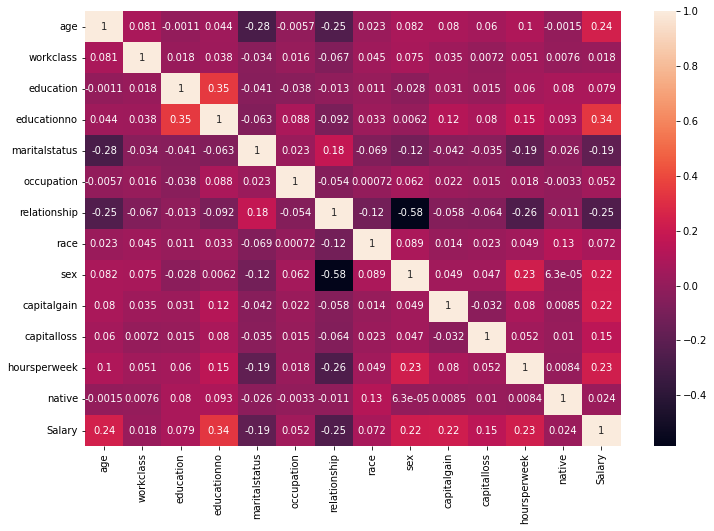

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_1,annot= True)
plt.show()

In [13]:
data_train.drop('workclass',inplace=True,axis=1)
data_train.drop('education',inplace=True,axis=1)
data_train.drop('occupation',inplace=True,axis=1)
data_train.drop('race',inplace=True,axis=1)
data_train.drop('native',inplace=True,axis=1)

In [14]:
data_train.head()

,age,educationno,maritalstatus,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,1,2174,0,40,0
1,50,13,2,0,1,0,0,13,0
2,38,9,0,1,1,0,0,40,0
3,53,7,2,0,1,0,0,40,0
4,28,13,2,5,0,0,0,40,0


In [15]:
x_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,8:]

In [16]:
scale = StandardScaler()
std = scale.fit_transform(x_train)
x_std_train = pd.DataFrame(std,columns=x_train.columns)

In [17]:
x_std_train.head()

,age,educationno,maritalstatus,relationship,sex,capitalgain,capitalloss,hoursperweek
0,0.042779,1.128898,0.947877,-0.261233,0.692771,0.146085,-0.218508,-0.077735
1,0.880261,1.128898,-0.387243,-0.885712,0.692771,-0.147447,-0.218508,-2.331495
2,-0.033356,-0.439733,-1.722362,-0.261233,0.692771,-0.147447,-0.218508,-0.077735
3,1.108665,-1.224048,-0.387243,-0.885712,0.692771,-0.147447,-0.218508,-0.077735
4,-0.794703,1.128898,-0.387243,2.236683,-1.443479,-0.147447,-0.218508,-0.077735


## Import Test data

In [18]:
data_test = pd.read_csv('SalaryData_test(1).csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [19]:
data_test.shape

(15060, 14)

In [20]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [21]:
data_test.drop('workclass',inplace=True,axis=1)
data_test.drop('education',inplace=True,axis=1)
data_test.drop('occupation',inplace=True,axis=1)
data_test.drop('race',inplace=True,axis=1)
data_test.drop('native',inplace=True,axis=1)

In [22]:
data_test.head()

,age,educationno,maritalstatus,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,Never-married,Own-child,Male,0,0,40,<=50K
1,38,9,Married-civ-spouse,Husband,Male,0,0,50,<=50K
2,28,12,Married-civ-spouse,Husband,Male,0,0,40,>50K
3,44,10,Married-civ-spouse,Husband,Male,7688,0,40,>50K
4,34,6,Never-married,Not-in-family,Male,0,0,30,<=50K


In [23]:
data_test['maritalstatus'] = le.fit_transform(data_test['maritalstatus'])
data_test['relationship'] = le.fit_transform(data_test['relationship'])
data_test['sex'] = le.fit_transform(data_test['sex'])
data_test['Salary'] = le.fit_transform(data_test['Salary'])

In [24]:
data_test.head()

,age,educationno,maritalstatus,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,4,3,1,0,0,40,0
1,38,9,2,0,1,0,0,50,0
2,28,12,2,0,1,0,0,40,1
3,44,10,2,0,1,7688,0,40,1
4,34,6,4,1,1,0,0,30,0


In [25]:
x_test = data_test.iloc[:,:-1]
y_test = data_test.iloc[:,8:]

In [26]:
std_test = scale.fit_transform(x_test)
x_std_test = pd.DataFrame(std_test,columns=x_test.columns)
x_std_test.head()

,age,educationno,maritalstatus,relationship,sex,capitalgain,capitalloss,hoursperweek
0,-1.029005,-1.216563,0.933187,1.006108,0.695832,-0.145438,-0.219169,-0.078889
1,-0.057423,-0.434898,-0.395463,-0.881990,0.695832,-0.145438,-0.219169,0.750131
2,-0.804794,0.737599,-0.395463,-0.881990,0.695832,-0.145438,-0.219169,-0.078889
3,0.391000,-0.044066,-0.395463,-0.881990,0.695832,0.852624,-0.219169,-0.078889
4,-0.356371,-1.607395,0.933187,-0.252624,0.695832,-0.145438,-0.219169,-0.907909


In [27]:
model_linear = SVC(kernel='linear')
model_linear.fit(x_std_train,y_train)

SVC(kernel='linear')

In [28]:
train_pred_linear = model_linear.predict(x_std_train)
print('Train Accuracy : ',accuracy_score(y_train,train_pred_linear)*100)

Train Accuracy :  81.00527170849773


In [29]:
print('Classification Report : \n',classification_report(y_train,train_pred_linear))

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     22653
           1       0.79      0.32      0.46      7508

    accuracy                           0.81     30161
   macro avg       0.80      0.65      0.67     30161
weighted avg       0.81      0.81      0.78     30161



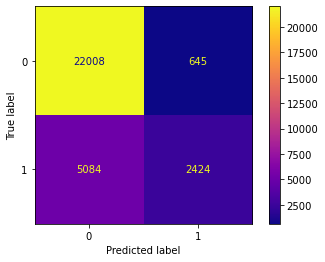

In [30]:
plot_confusion_matrix(model_linear,x_std_train,y_train,cmap='plasma')

In [31]:
test_pred_linear = model_linear.predict(x_std_test)
print('Test Accuracy : ',accuracy_score(y_test,test_pred_linear)*100)
print('Classification Report : \n',classification_report(y_test,test_pred_linear))

Test Accuracy :  80.80345285524568
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.31      0.44      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.64      0.66     15060
weighted avg       0.80      0.81      0.78     15060



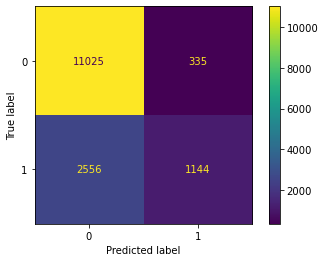

In [32]:
plot_confusion_matrix(model_linear,x_std_test,y_test)
plt.show()

In [33]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_std_train,y_train)
train_pred_rbf = model_rbf.predict(x_std_train)

In [34]:
print('Training Accuracy :',accuracy_score(y_train,train_pred_rbf)*100)
print('Classification Report : \n',classification_report(y_train,train_pred_rbf))

Training Accuracy : 84.81151155465668
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22653
           1       0.77      0.55      0.64      7508

    accuracy                           0.85     30161
   macro avg       0.82      0.75      0.77     30161
weighted avg       0.84      0.85      0.84     30161



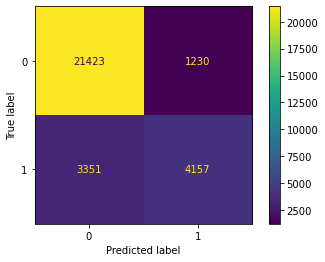

In [35]:
plot_confusion_matrix(model_rbf,x_std_train,y_train)

In [36]:
test_pred_rbf = model_rbf.predict(x_std_test)

In [37]:
print('Testing Accuracy :',accuracy_score(y_test,test_pred_rbf)*100)
print('Classification Report : \n',classification_report(y_test,test_pred_rbf))

Testing Accuracy : 84.62815405046481
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     11360
           1       0.76      0.54      0.63      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.85      0.84     15060



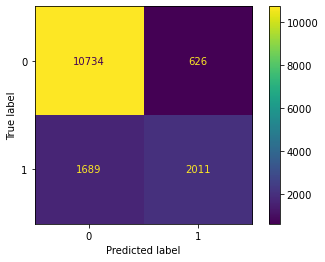

In [38]:
plot_confusion_matrix(model_rbf,x_std_test,y_test)
plt.show()

In [39]:
model_poly = SVC(kernel='poly')
model_poly.fit(x_std_train,y_train)
train_pred_poly = model_poly.predict(x_std_train)
print('Training Accuracy :',accuracy_score(y_train,train_pred_poly)*100)

Training Accuracy : 84.10198600842148


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     22653
           1       0.78      0.51      0.61      7508

    accuracy                           0.84     30161
   macro avg       0.81      0.73      0.76     30161
weighted avg       0.83      0.84      0.83     30161



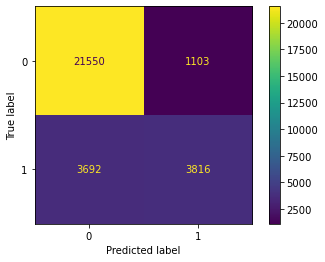

In [40]:
print('Classification Report : \n',classification_report(y_train,train_pred_poly))
plot_confusion_matrix(model_poly,x_std_train,y_train)

In [41]:
test_pred_poly = model_poly.predict(x_std_test)
print('Testing Accuracy :',accuracy_score(y_test,test_pred_poly)*100)
print('Classification Report : \n',classification_report(y_test,test_pred_poly))

Testing Accuracy : 83.89110225763612
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     11360
           1       0.76      0.50      0.60      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.73      0.75     15060
weighted avg       0.83      0.84      0.83     15060



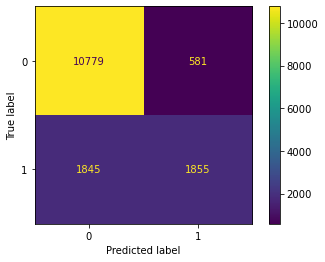

In [42]:
plot_confusion_matrix(model_poly,x_std_test,y_test)
plt.show()

model_rbf is the best SVM classification model for given data.

In [50]:
pred_df = pd.DataFrame(test_pred_rbf)

In [54]:
df = pd.concat([y_test,pred_df],axis=1,join='outer')
df.columns = ['True','Predicted']
df

,True,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,1
15058,0,0
